<a href="https://colab.research.google.com/github/21958070/Assignment1/blob/main/sid%2Csname_Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Australian Energy Dataset is a comprehensive collection of data pertaining to energy consumption, production, and related metrics across various states in Australia. Stored in an SQLite database format, it includes information on energy sources such as coal, oil, gas, and renewables, as well as economic indicators like Gross State Product (GSP) and population figures. The aim of this report is to provide a thorough analysis of the Australian Energy Dataset, offering insights into energy consumption patterns, trends, and relationships with economic indicators.

**Key points of analysis**


1.   Total Energy Consumption by State
2.   Total Energy Consumption by Fuel Type
3. Total energy consumption for each state, broken down by fuel type.
4. Energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.

# Detailed algorithm



*   Upload Database File and Import Libraries:
     *   Upload the 'AUS_energy_sqlite3.db' file to the working directory.
     *   Import the necessary libraries: sqlite3, pandas, and matplotlib.pyplot.


*   Connect to SQLite Database:
    *  Create a connection to the SQLite database using sqlite3.connect().

* Get Table Information:

  *  Execute a query to retrieve table names from the database.
  * Fetch all table names using cursor.fetchall().
  * Print the list of tables (useful for verification).
* Explore Table Data:

   * Execute a query to get a limited number of rows from the 'AUS_energy' table.
   * Fetch the results using cursor.fetchall().
   * Print the initial rows to get an idea of the data structure.

* Get Column Names:
  * Execute a query using PRAGMA table_info(AUS_energy) to get column information for the 'AUS_energy' table.
  * Fetch column details using cursor.fetchall().
  * Print the column names (helpful for understanding the data).

*   Load Data into Pandas DataFrame:
    *   Read the 'AUS_energy' table from the SQLite database into a Pandas DataFrame using pd.read_sql_query().
* Clean the DataFrame

  * Handle missing values using df.dropna().
  * Convert relevant columns (e.g., Coal (PJ), Oil (PJ)) to numeric data types using pd.to_numeric, handling potential errors with the errors argument.
  * Remove rows with NaN values that might arise after conversion using df.dropna() again.
  * Print the cleaned DataFrame
* Detailed data analysis

  *   Compute and Visualize Total Energy Consumption by State:
    *   Group the DataFrame by state and sum energy
consumption for each energy source.
    *  Plot a stacked bar chart showing total energy consumption for each state.

  *   Compute and Visualize Total Energy Consumption by Fuel Type:
    *   Convert relevant columns to numeric data types.
    *   Sum energy consumption for each fuel type.
    *   Plot a pie chart showing the proportion of energy consumption for each fuel type.

  *   Analyze and Visualize Total Energy Consumption by State, Broken Down by Fuel Type:
    *   Group the DataFrame by state and sum energy consumption for each fuel type.
    *   Plot a stacked bar chart showing total energy consumption by state and fuel type.

  *   Analyze Energy Intensity for Each State Annually:
    *  Calculate energy intensity (energy consumption per unit of GSP) for each state annually.
    *   Plot a line chart showing energy intensity for each state annually.









# **Developing the code**


**Import necessay libraries**

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

**Connect to the SQLite database and fetch table names**

In [36]:

# Connect to the SQLite database
conn = sqlite3.connect('AUS_energy_sqlite3.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute SQL command to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])


Tables in the database:
AUS_energy


**Getting rows**

In [37]:
# Execute an SQL query to retrieve data from the 'AUS_energy' table
cursor.execute("SELECT * FROM AUS_energy LIMIT 10")

# Fetch the results
rows = cursor.fetchall()

# Print the data
print("\nFirst 5 rows of the 'AUS_energy' table:")
for row in rows:
    print(row)

# Close the cursor and connection for now
cursor.close()
conn.close()



First 5 rows of the 'AUS_energy' table:
('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695)
('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532)
('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579)
('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526)
('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174)
('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165)
('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562)
('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326)
('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670)
('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276)


**Getting columns**

In [38]:
# Reconnect to the SQLite database
conn = sqlite3.connect('AUS_energy_sqlite3.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute SQL query to fetch column names
cursor.execute("PRAGMA table_info(AUS_energy)")

# Fetch column names
columns = cursor.fetchall()

# Print column names
print("\nColumn names in the 'AUS_energy' table:")
for column in columns:
    print(column[1])

# Close the cursor and connection
cursor.close()
conn.close()



Column names in the 'AUS_energy' table:
Year
State
Coal (PJ)
Oil (PJ)
Gas (PJ)
Renewables (PJ)
Population
GSP ($ million)


**Load the data into a DataFrame**



Generating code using Gen AI

*Promt:* I got table name, rows and columns from a database file using SQLite, now how can i load the data into dataframe to analyze the data?

*Gen AI response:* (modified table and database name by myself)

In [39]:
# Connect to the SQLite database
conn = sqlite3.connect('AUS_energy_sqlite3.db')

# Read data into a DataFrame
query = "SELECT * FROM AUS_energy"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the DataFrame to verify
print("\nFirst few rows of the DataFrame:")
print(df.head())



First few rows of the DataFrame:
      Year State Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0  2008-09    WA     132.9     294.3     474.7             15.6     2240250   
1  2008-09   NSW     800.9     587.5     131.6             54.7     7408540   
2  2008-09   VIC     695.3     432.9     273.5             33.6     5371934   
3  2008-09   QLD     629.2     469.5     187.9             77.4     4328771   
4  2008-09    SA      80.2     120.2     134.0             21.2     1608902   

   GSP ($ million)  
0           244695  
1           530532  
2           368579  
3           284526  
4           100174  


**Cleaning the data**

Generating code using Gen AI

*Promt:* clean the dataframe before make it ready for analyzing.

*Gen AI respose:*

In [40]:
# Handle missing values, if any
df = df.dropna()

# Convert columns to numeric, if necessary
numeric_cols = ['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)', 'GSP ($ million)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Remove any remaining rows with NaN values after conversion
df = df.dropna()

# Display the cleaned DataFrame to verify
print("\nCleaned DataFrame:")
print(df.head())


Cleaned DataFrame:
      Year State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)  Population  \
0  2008-09    WA      132.9     294.3     474.7             15.6     2240250   
1  2008-09   NSW      800.9     587.5     131.6             54.7     7408540   
2  2008-09   VIC      695.3     432.9     273.5             33.6     5371934   
3  2008-09   QLD      629.2     469.5     187.9             77.4     4328771   
4  2008-09    SA       80.2     120.2     134.0             21.2     1608902   

   GSP ($ million)  
0           244695  
1           530532  
2           368579  
3           284526  
4           100174  


# **Group A**

## **1. Compute and visualize the total energy consumption for each state.**

In order to find the total energy consumption for each state, we will compute and visualize the total energy consumption by state in a dataset. It groups the data by state, sums the consumption of various energy sources (coal, oil, gas, renewables), and creates a stacked bar chart. We will also create a table which contains only energy consumption.


*Source: https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib*

**Generating code using Gen AI**

**Gen AI prompt:** How to load data into data frame excluding Year, Population, GSP ($ million) from this list of columns:

*   Year
*   State
*   Coal (PJ)
*   Oil (PJ)
*   Gas (PJ)
*   Renewables (PJ)
* Population
*   GSP ($ million)





**Gen AI response:**

In [41]:
# Excluding unnecessary columns if they exist
columns_to_drop = ['Year', 'Population', 'GSP ($ million)']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verifying  the columns have been excluded
print("DataFrame after dropping unnecessary columns:")
print(df.head())

DataFrame after dropping unnecessary columns:
  State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
0    WA      132.9     294.3     474.7             15.6
1   NSW      800.9     587.5     131.6             54.7
2   VIC      695.3     432.9     273.5             33.6
3   QLD      629.2     469.5     187.9             77.4
4    SA       80.2     120.2     134.0             21.2


**Modification:** print("DataFrame after dropping unnecessary columns:") to print ("DataFrame of Energy Consumption)

In [42]:
# Excluding unnecessary columns if they exist
columns_to_drop = ['Year', 'Population', 'GSP ($ million)']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Verifying  the columns have been excluded
print("DataFrame of Energy Consumption:")
print(df.head())

DataFrame of Energy Consumption:
  State  Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
0    WA      132.9     294.3     474.7             15.6
1   NSW      800.9     587.5     131.6             54.7
2   VIC      695.3     432.9     273.5             33.6
3   QLD      629.2     469.5     187.9             77.4
4    SA       80.2     120.2     134.0             21.2


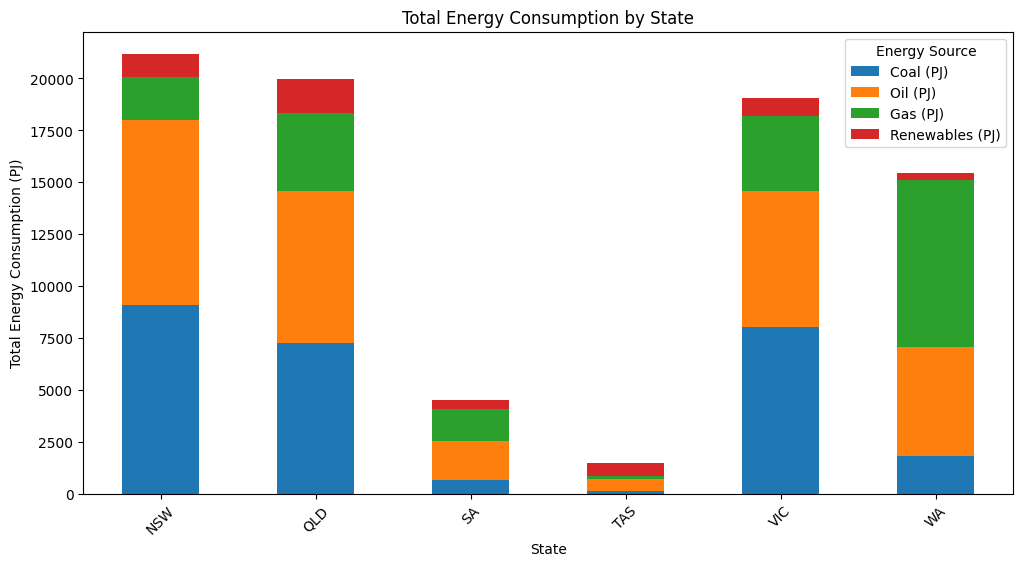

In [43]:
# Group by state and sum energy consumption
state_energy = df.groupby('State').sum()[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']]

# Plot total energy consumption for each state
state_energy.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Energy Consumption by State')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xticks(rotation=45)
plt.legend(title='Energy Source')
plt.show()

The graph compares the total energy consumption in petajoules (PJ) for six different Australian states: NSW, QLD, SA, TAS, VIC, and WA. This X-axis represents the different states included in the dataset. Each state has a corresponding bar in the chart. This Y-axis shows the total energy consumption measured in Petajoules (PJ).

Each state’s bar is divided into four colors (blue, orange, green, red), representing different energy sources: Coal, Oil, Gas, and Renewables. The length of each colored segment within a bar corresponds to the contribution of that energy source to the state’s total consumption. From the graph, it can be noted that, TAS relies heavily on renewables, while NSW and QLD have significant contributions from coal.

## **2. Compute and visualize the total energy consumption by fuel type.**

To find the total energy consumption by fuel type, we select the relevant columns from the data, sums their values to get the total consumption for each fuel type, and then uses a pie chart to represent these totals. The pie chart slices show the percentage contribution of each fuel type, providing a clear understanding of the energy mix.

*SOURCE: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct*

**Generating code using Gen AI**

**Gen AI prompt:** How to load only energy consumption by fuel type data into data frame from this list of columns:

Year
State
Coal (PJ)
Oil (PJ)
Gas (PJ)
Renewables (PJ)
Population
GSP ($ million)

**Gen AI response:**

In [44]:
# listing fuel type data into dataframe
fuel_energy_df = pd.DataFrame(fuel_energy, columns=['Total Energy Consumption (PJ)'])

# Display the DataFrame
print(fuel_energy_df)

NameError: name 'fuel_energy' is not defined

In [45]:
# Plot total energy consumption by fuel type
fuel_energy.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Total Energy Consumption by Fuel Type')
plt.ylabel('')
plt.show()

NameError: name 'fuel_energy' is not defined

The pie chart represents the distribution of energy consumption across different fuel sources. Each section of the pie chart corresponds to a specific fuel type, and its size represents the proportion of total energy consumption attributed to that source. According to the key fuel types displayed in the chart:
Oil: The largest section, accounting for 37.3% of total consumption;
Coal: Represents 33.0% of the energy consumed;
Gas: Contributes 23.5% to the overall consumption;
Renewables: The smallest segment, making up 6.2% of the total energy use.
This graph visually illustrates the relative importance of different fuel sources in meeting energy demands. Oil dominates, followed by coal, gas, and renewables.

# Group B



# A. Analyse and visualise the total energy consumption for each state, broken down by fuel type.
For analyzing and visualizing the total energy consumption for each state, broken down by fuel, and relevant columns will be extract from the Aus_energy table creating a new dataframe. Here we will group and order for each state,broken down by fuel type and convert into the graph.

**Generating code using Gen AI**

**Gen AI Prompt:**
How to load total energy consumption for each state, broken down by fuel into dataframe.

**Gen AI response:**




In [33]:
sql = '''
SELECT
    State, `Coal (PJ)`, `Oil (PJ)`, `Gas (PJ)`, `Renewables (PJ)`
FROM
    AUS_energy
'''
state_energy_consumption = df.groupby('State').sum()
print(state_energy_consumption.head())

       Coal (PJ)  Oil (PJ)  Gas (PJ)  Renewables (PJ)
State                                                
NSW       9076.7    8902.4    2071.5           1148.4
QLD       7259.9    7338.6    3747.1           1633.6
SA         651.7    1857.7    1549.7            448.3
TAS        143.3     545.7     167.8            618.2
VIC       8007.5    6580.6    3608.3            865.1


This table effectively summarizes the total energy consumption by fuel type for each state. It helps in understanding the energy mix and dependency on different types of energy sources for each state. For example, New South Wales (NSW) has high coal and oil consumption, whereas Tasmania (TAS) has a higher proportion of renewable energy consumption relative to other states.

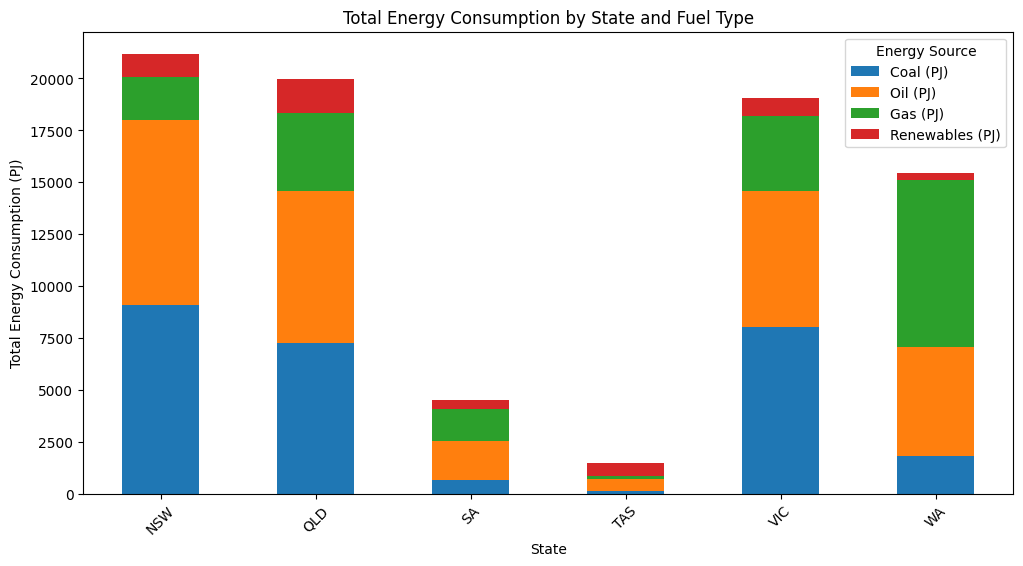

In [34]:
##Analyse and visualise the total energy consumption for each state, broken down by fuel type.
import matplotlib.pyplot as plt

# Group by state and sum energy consumption for each fuel type
state_fuel_energy = df.groupby('State').sum()[['Coal (PJ)', 'Oil (PJ)', 'Gas (PJ)', 'Renewables (PJ)']]

# Plot total energy consumption for each state broken down by fuel type
state_fuel_energy.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Total Energy Consumption by State and Fuel Type')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.xticks(rotation=45)
plt.legend(title='Energy Source')
plt.show()

The graph shows the total energy consumption by fuel type (Coal, Oil, Gas, and Renewables) for each state (NSW, QLD, SA, TAS, and VIC) in Petajoules (PJ). The x-axis represents the different states, while the y-axis shows the total energy consumption in PJ. Each bar in the graph is segmented to display the contribution of each fuel type to the overall energy consumption of that state. For instance, New South Wales (NSW) has a high total energy consumption, with significant contributions from both coal and oil. Queensland (QLD) also shows substantial coal and oil consumption, alongside notable gas usage. Tasmania (TAS), in contrast, has lower total energy consumption but a relatively higher proportion of renewable energy usage. This visual representation helps in understanding the energy mix and dependency on various fuel types across different states, highlighting the dominance of certain fuels in particular regions.


**Gen AI Response Effectiveness:**

The response effectively explains the process of grouping and summing the energy consumption data by state and describes the resulting output in detail, including an interpretation of the values.


**Modification Needed:**

None. The response is clear and comprehensive.



# Group c



# A. Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.

In order to analyze nergy intensity, defined as energy consumption per unit of GSP, for each state annually, we will group the data by state_year_energy_intensity and convert them into graph.


**Generating code using Gen AI**

**Gen AI Prompt:** How to load total energy intensity, defined as energy consumption per unit of GSPinto dataframe.

**Gen AI response:**
To analysTo analyze the energy intensity (defined as energy consumption per unit of GSP) for each state annually, we need to follow these steps:



In [ ]:
#SQL query to extract relevant data
sql_query = '''
SELECT
    Year, State, `Coal (PJ)`, `Oil (PJ)`, `Gas (PJ)`, `Renewables (PJ)`, `GSP ($ million)`
FROM
    AUS_energy
'''
#This groups the data by both State and Year.
state_year_energy_intensity = df.groupby(['State', 'Year']).mean()['Energy Intensity'].unstack()
#Printing the first few rows of the resulting DataFrame gives a quick view of the data structure and values.
print(state_year_energy_intensity.head())

Year    2008-09   2009-10   2010-11   2011-12   2012-13   2013-14   2014-15  \
State                                                                         
NSW    0.002968  0.003008  0.002964  0.002823  0.002683  0.002560  0.002383   
QLD    0.004794  0.004535  0.004334  0.004296  0.004209  0.004127  0.004449   
SA     0.003550  0.003324  0.003229  0.002843  0.003271  0.003063  0.003222   
TAS    0.003632  0.003753  0.003786  0.003475  0.003959  0.003872  0.003212   
VIC    0.003894  0.003859  0.003849  0.003775  0.003646  0.003491  0.003425   

Year    2015-16   2016-17   2017-18   2018-19   2019-20   2020-21   2021-22  
State                                                                        
NSW    0.002390  0.002337  0.002333  0.002265  0.002155  0.001993  0.001916  
QLD    0.004403  0.004497  0.004399  0.004292  0.004217  0.003967  0.003742  
SA     0.002823  0.002483  0.002947  0.002826  0.002791  0.002581  0.002382  
TAS    0.003303  0.003303  0.003364  0.003217  0.002995 

The table provides a detailed view of how energy intensity has evolved in each state over the years.

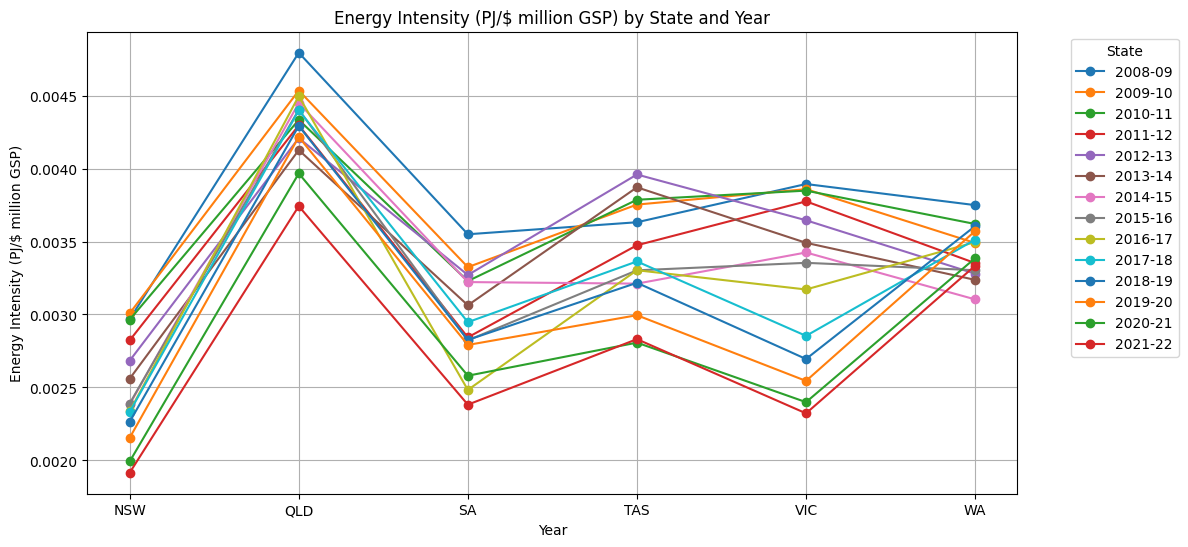

In [ ]:
# Calculate energy intensity (energy consumption per unit of GSP)
df['Energy Intensity'] = (df['Coal (PJ)'] + df['Oil (PJ)'] + df['Gas (PJ)'] + df['Renewables (PJ)']) / df['GSP ($ million)']

# Group by state and year and calculate the mean energy intensity
state_year_energy_intensity = df.groupby(['State', 'Year']).mean()['Energy Intensity'].unstack()

# Plot energy intensity for each state annually
state_year_energy_intensity.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Energy Intensity (PJ/$ million GSP) by State and Year')
plt.xlabel('Year')
plt.ylabel('Energy Intensity (PJ/$ million GSP)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The graph represents the energy intensity, measured as energy consumption per unit of Gross State Product (GSP). The energy intensity is calculated in million. States with lower energy intensity values demonstrate a more efficient utilization of energy resources relative to their economic output, while higher values indicate a higher energy consumption relative to economic productivity. By tracking changes in energy intensity over time, policymakers and stakeholders can identify areas for improvement in energy efficiency and implement targeted strategies to enhance sustainability and economic competitiveness.

**Gen AI response effectiveness:** The steps and code provided effectively load the data, calculate energy intensity, group it by state and year, and plot the results. The code snippets are complete and functional.

**Gen AI modifications:**
None. The response is clear and comprehensive.


# Limitations


The data cover only a specific time period, potentially missing longer-term trends or recent changes in energy consumption patterns. There might be missing data for certain years, states, or fuel types, which can affect the accuracy and completeness of database analyse.Differences in how data is recorded or classified across states and years can lead to challenges in ensuring consistency and comparability of the data
is.Differences in how data is recorded or classified across states and years This can lead to challenges in ensuring consistency and comparability of the data. SQLite is designed for lightweight, embedded use and may not scale well for very large datasets or for concurrent access by many users, which can be a limitation for extensive analyses or large-scale applications.


# **References**


https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib*

https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct*

